In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from tensorflow.keras import regularizers
import seaborn as sns

In [2]:
Training_Data = pd.read_csv("csvTrainImages 13440x1024.csv",header=None)
Training_Data_Labels = pd.read_csv("csvTrainLabel 13440x1.csv",header = None,names=['Label'])
Testing_Data = pd.read_csv("csvTestImages 3360x1024.csv",header = None)
Testing_Data_Labels = pd.read_csv("csvTestLabel 3360x1.csv",header=None,names=['Label'])

In [3]:
models_name = []
models_accuracy = []
arabic_letters = ['ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي']

In [4]:
ClassesCount = Training_Data_Labels['Label'].nunique()
ClassDistribution = Training_Data_Labels['Label'].value_counts()
print(f"Number of unique classes: {ClassesCount}")
print("Class distribution:")
print(ClassDistribution)

Number of unique classes: 28
Class distribution:
1     480
2     480
27    480
26    480
25    480
24    480
23    480
22    480
21    480
20    480
19    480
18    480
17    480
16    480
15    480
14    480
13    480
12    480
11    480
10    480
9     480
8     480
7     480
6     480
5     480
4     480
3     480
28    480
Name: Label, dtype: int64


In [5]:
def Display(Images_Vector):
    image_matrix = np.reshape(Images_Vector, (32, 32))
    plt.imshow(image_matrix, cmap='gray')
    plt.axis('off')
    plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(Training_Data,Training_Data_Labels['Label'],test_size=0.2,  random_state=3)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0
Testing_Data = Testing_Data / 255.0

In [8]:
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

shape of X_train: (10752, 1024), shape of y_train: (10752,)


In [9]:
nueral_neatwork_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1024,)),
    tf.keras.layers.Dense(512, activation='relu', name="L1"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4,seed = 46),
    tf.keras.layers.Dense(256, activation='relu', name="L2"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4,seed = 42),
    tf.keras.layers.Dense(128, activation='relu', name="L3"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(29, activation='linear', name="L5")
],name = "nueral_neatwork_1")

In [10]:
nueral_neatwork_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001), 
    metrics=['accuracy'])

In [11]:
nueral_neatwork_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1024,)),
    tf.keras.layers.Dense(128, activation='relu', name="L1"),
    tf.keras.layers.Dense(64, activation='relu', name="L2"),
    tf.keras.layers.Dense(29, activation='softmax', name="L3")
],name = "nueral_neatwork_2")

In [12]:
nueral_neatwork_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.01), 
    metrics=['accuracy'])

In [13]:
models = [nueral_neatwork_1, nueral_neatwork_2]
history = []

for model in models:    
    hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
    history.append(hist)
    models_name.append(model.name)
    models_accuracy.append(test_accuracy)

Epoch 1/50
336/336 [==============================] - 3s 7ms/step - loss: 2.5392 - accuracy: 0.2577 - val_loss: 1.7799 - val_accuracy: 0.4271
Epoch 2/50
336/336 [==============================] - 2s 6ms/step - loss: 1.7566 - accuracy: 0.4312 - val_loss: 1.3227 - val_accuracy: 0.5592
Epoch 3/50
336/336 [==============================] - 2s 6ms/step - loss: 1.4733 - accuracy: 0.5077 - val_loss: 1.1499 - val_accuracy: 0.5997
Epoch 4/50
336/336 [==============================] - 2s 7ms/step - loss: 1.3033 - accuracy: 0.5546 - val_loss: 1.0335 - val_accuracy: 0.6469
Epoch 5/50
336/336 [==============================] - 2s 7ms/step - loss: 1.1626 - accuracy: 0.6005 - val_loss: 0.9748 - val_accuracy: 0.6544
Epoch 6/50
336/336 [==============================] - 2s 6ms/step - loss: 1.0671 - accuracy: 0.6332 - val_loss: 0.9091 - val_accuracy: 0.6741
Epoch 7/50
336/336 [==============================] - 2s 6ms/step - loss: 0.9768 - accuracy: 0.6613 - val_loss: 0.8617 - val_accuracy: 0.6923
Epoch 

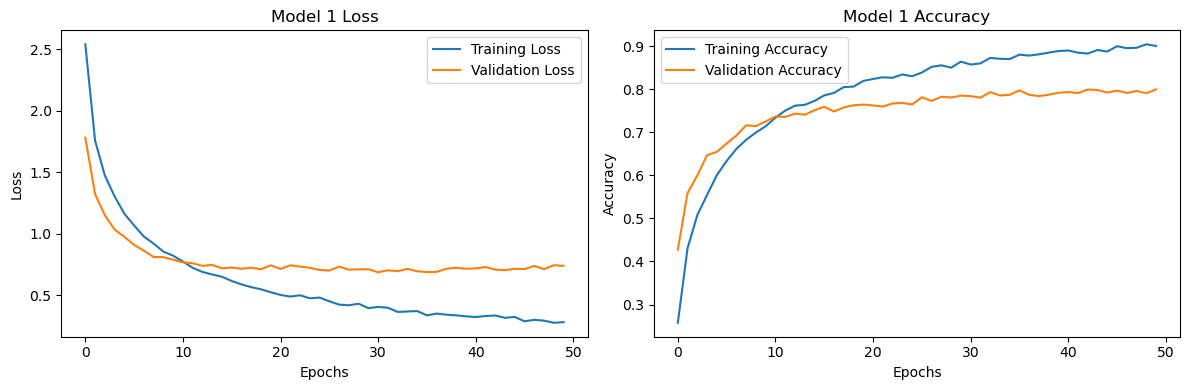

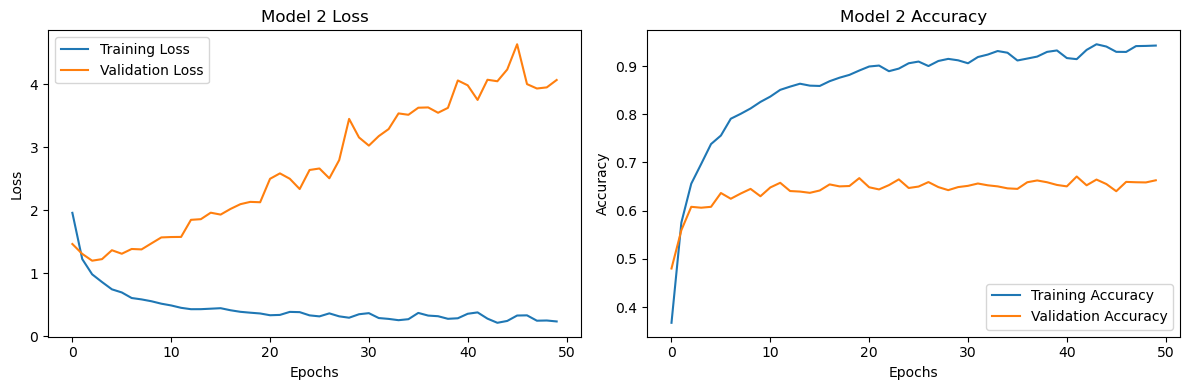

In [14]:
for i, hist in enumerate(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f"Model {i+1} Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['accuracy'], label='Training Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f"Model {i+1} Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [15]:
best_model_index = np.argmax([hist.history['val_accuracy'][-1] for hist in history])
best_model = models[best_model_index]
best_model.save('best_model.h5')

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
loaded_model = tf.keras.models.load_model('best_model.h5')

105/105 [==============================] - 0s 2ms/step
Best Model F1 Score: 0.8119611420777219


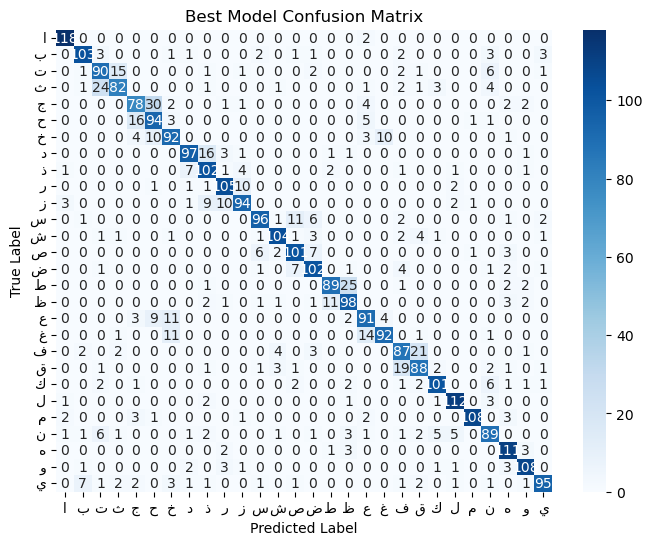

In [17]:
best_model_predictions = loaded_model.predict(Testing_Data)
best_model_predictions = np.argmax(best_model_predictions, axis=1)

best_model_f1_score = f1_score(Testing_Data_Labels, best_model_predictions, average='weighted')
best_model_conf_matrix = confusion_matrix(Testing_Data_Labels, best_model_predictions)
print(f"Best Model F1 Score: {best_model_f1_score}")
plt.figure(figsize=(8, 6))
sns.heatmap(best_model_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=arabic_letters, yticklabels=arabic_letters)
plt.xticks(rotation = 360)
plt.title(f"Best Model Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
Testing_Data_Labels_Series = Testing_Data_Labels.stack()

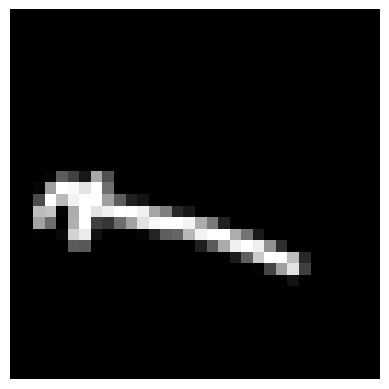

True Label: 1, Predicted Label: 1


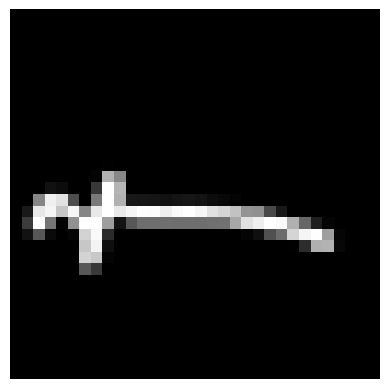

True Label: 1, Predicted Label: 1


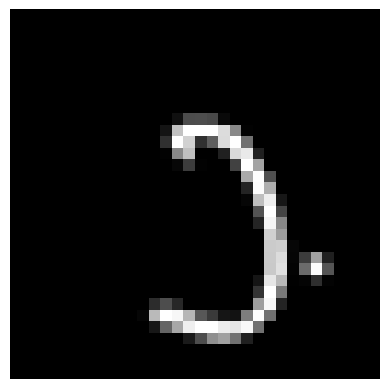

True Label: 2, Predicted Label: 2


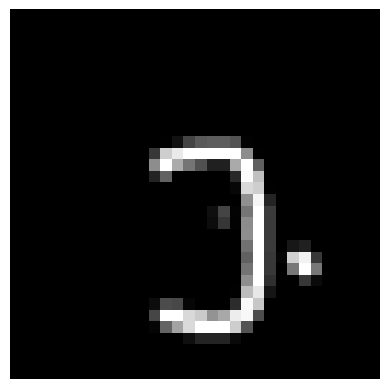

True Label: 2, Predicted Label: 2


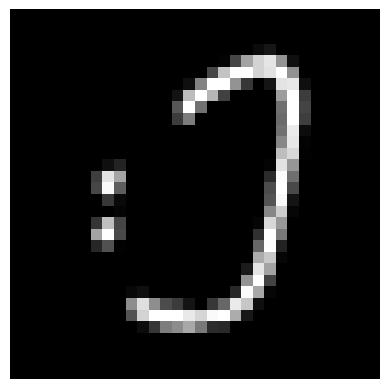

True Label: 3, Predicted Label: 3


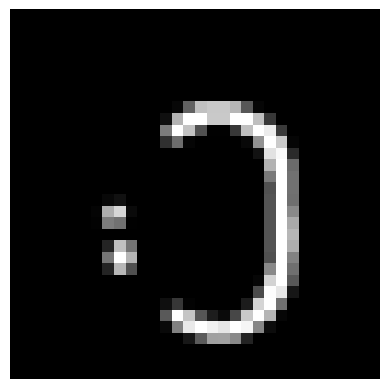

True Label: 3, Predicted Label: 3


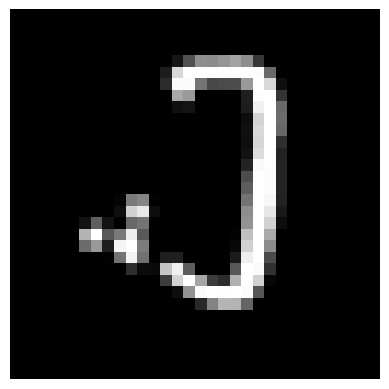

True Label: 4, Predicted Label: 3


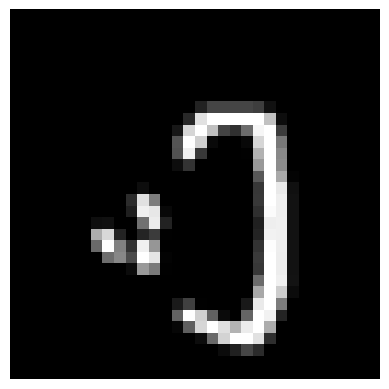

True Label: 4, Predicted Label: 4


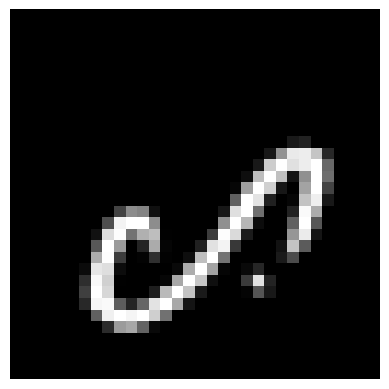

True Label: 5, Predicted Label: 6


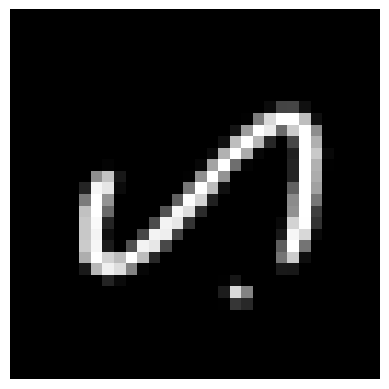

True Label: 5, Predicted Label: 5


In [19]:
for i in range(10):  # Display predictions for the first 10 images
    Display(Testing_Data.iloc[i].values)
    print(f'True Label: {Testing_Data_Labels_Series.iloc[i]}, Predicted Label: {best_model_predictions[i]}')

In [20]:
k=3
# I used the 'minkowiski' distance metric instead of 'euclidean' distance as it should be more suitable for images
# but it didnt give much better results
knn_model = KNeighborsClassifier(n_neighbors=k,metric='minkowski')

In [21]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
X_test_array = np.array(X_test)
predictions = knn_model.predict(X_test_array)

In [23]:
accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 45.31%


In [24]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]
Accuracy_Array = []
F1_Score_Array = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test_array)
    
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    
    Accuracy_Array.append(accuracy)
    F1_Score_Array.append(f1)
best_accuracy_index = np.argmax(Accuracy_Array)
models_name.append("KNN_4_model")
models_accuracy.append(Accuracy_Array[best_accuracy_index])

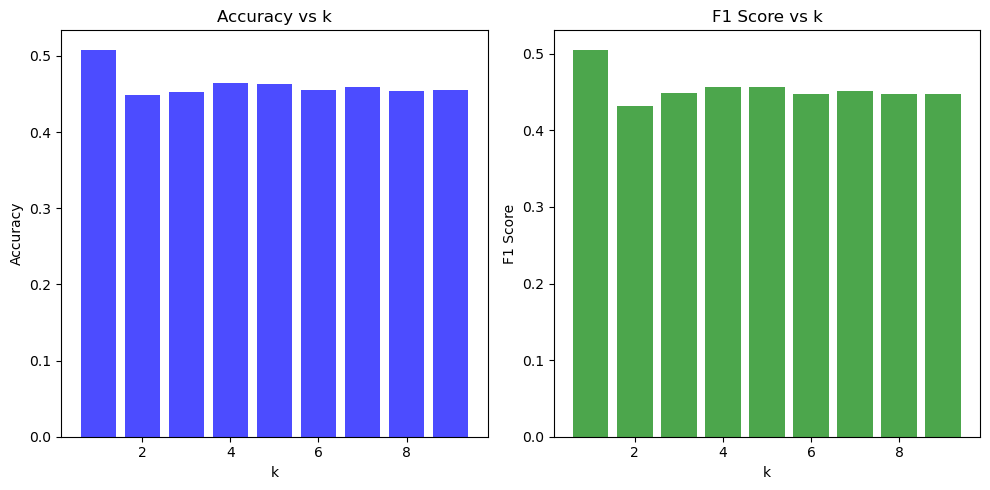

In [25]:
# Here I plotted an accuracy graph with respect to K and with respect to F_score
plt.figure(figsize=(10, 5))

# Plotting the Accuracy Graph
plt.subplot(1, 2, 1)
plt.bar(k_values, Accuracy_Array, color='blue', alpha=0.7)
plt.title('Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')

# Plotting the F1 Score graph
plt.subplot(1, 2, 2)
plt.bar(k_values, F1_Score_Array, color='green', alpha=0.7)
plt.title('F1 Score vs k')
plt.xlabel('k')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

Best Model F1 Score: 0.47906486392830705


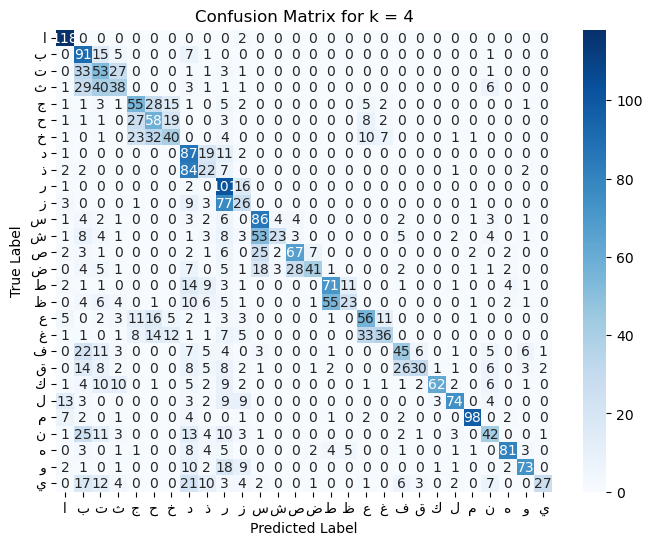

In [26]:
# We chose the k=4 as an optimum value although that k=1 has the best accuracy and f_1 score but it isnt realistic
# to have k = 1

Optimum_K = 4

# Create and fit the k-nearest neighbors model
knn_model = KNeighborsClassifier(n_neighbors=Optimum_K, metric='minkowski')
knn_model.fit(X_train, y_train)
Testing_Data_array = np.array(Testing_Data)
predictions = knn_model.predict(Testing_Data_array)
best_model_f1_score = f1_score(Testing_Data_Labels, predictions, average='weighted')
print(f"Best Model F1 Score: {best_model_f1_score}")
conf_matrix = confusion_matrix(Testing_Data_Labels, predictions)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=arabic_letters, yticklabels=arabic_letters)
plt.xticks(rotation = 360)
plt.title(f'Confusion Matrix for k = {Optimum_K}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [27]:
Testing_Data_array = np.array(Testing_Data)
predictions = knn_model.predict(Testing_Data_array)

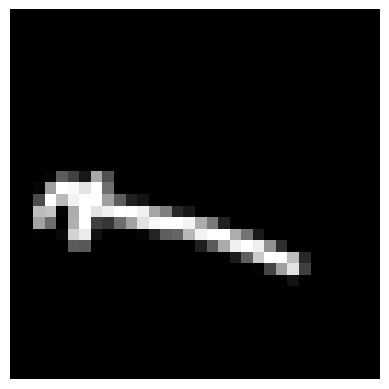

True Label: 1, Predicted Label: 1


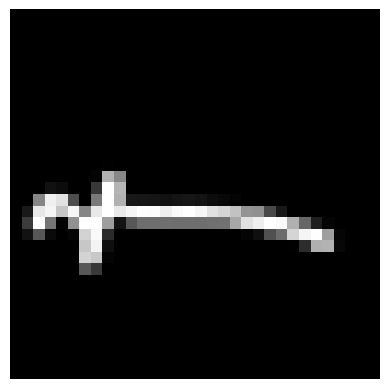

True Label: 1, Predicted Label: 1


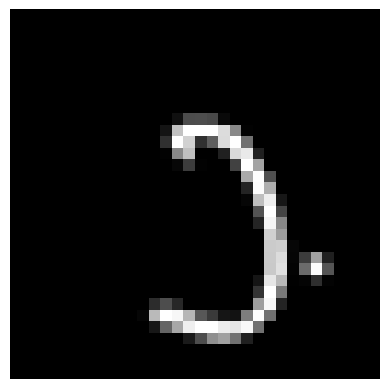

True Label: 2, Predicted Label: 2


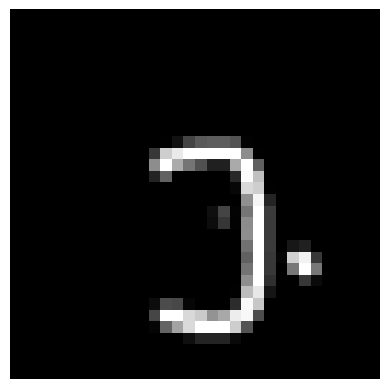

True Label: 2, Predicted Label: 2


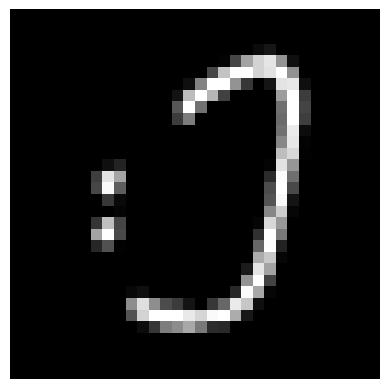

True Label: 3, Predicted Label: 4


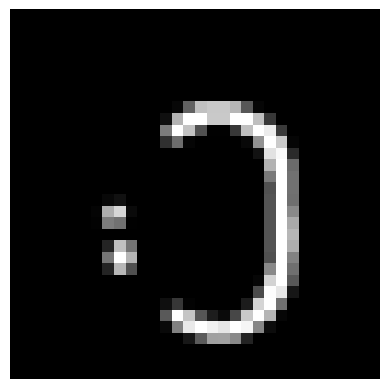

True Label: 3, Predicted Label: 3


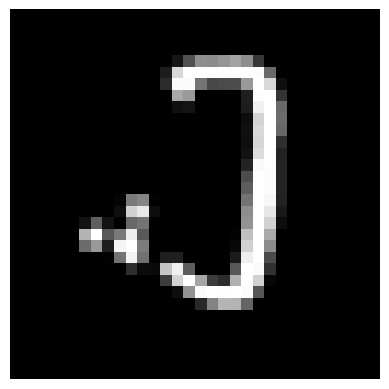

True Label: 4, Predicted Label: 3


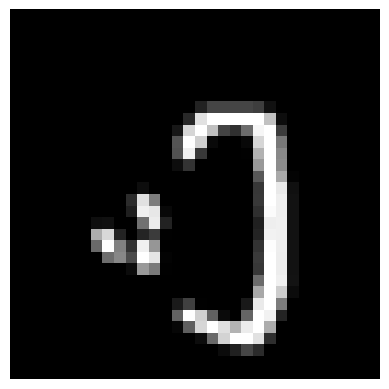

True Label: 4, Predicted Label: 4


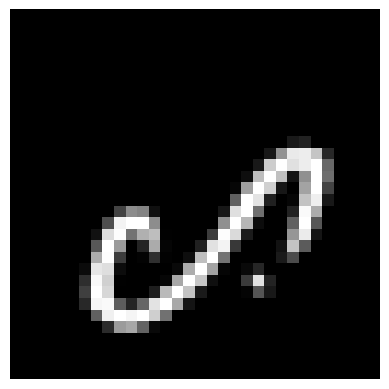

True Label: 5, Predicted Label: 11


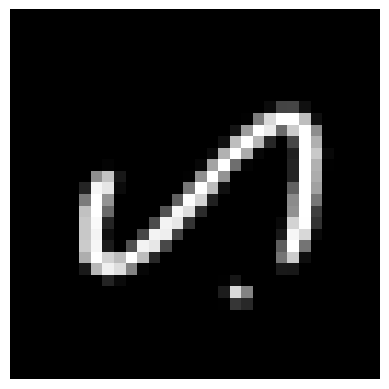

True Label: 5, Predicted Label: 6


In [28]:
for i in range(10):  # Display predictions for the first 10 images
    Display(Testing_Data_array[i])
    print(f'True Label: {Testing_Data_Labels_Series.iloc[i]}, Predicted Label: {predictions[i]}')

In [29]:
model = svm.SVC(kernel='linear', C=1.0) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
f1_avg = f1_score(y_test, y_pred, average='macro')

accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
models_name.append("SVM_model")
models_accuracy.append(accuracy)

Test Accuracy: 45.31%


Average F1 Score: 0.4505831330182448


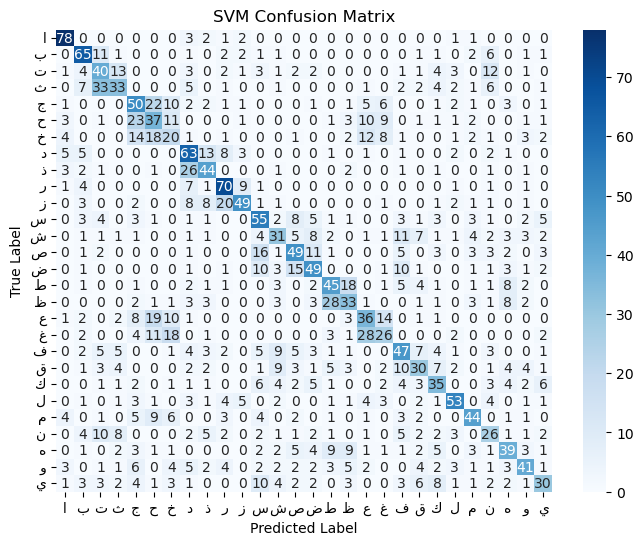

In [30]:
print("Average F1 Score:", f1_avg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=arabic_letters, yticklabels=arabic_letters)
plt.xticks(rotation = 360)
plt.title(f'SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

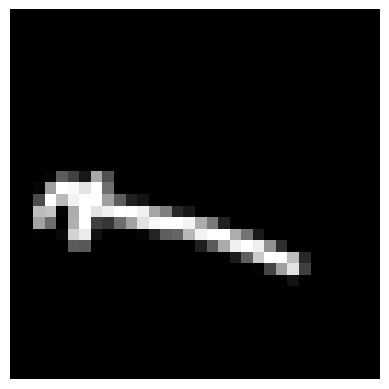

True Label: 1, Predicted Label: 1


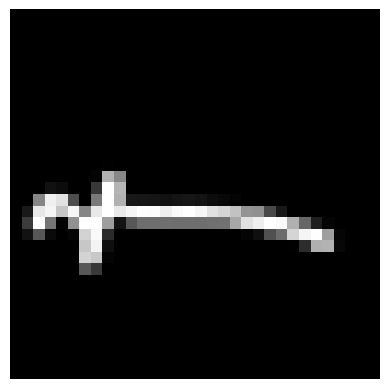

True Label: 1, Predicted Label: 1


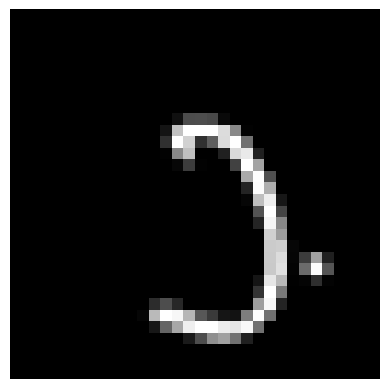

True Label: 2, Predicted Label: 2


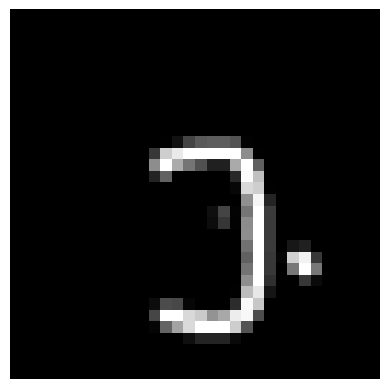

True Label: 2, Predicted Label: 2


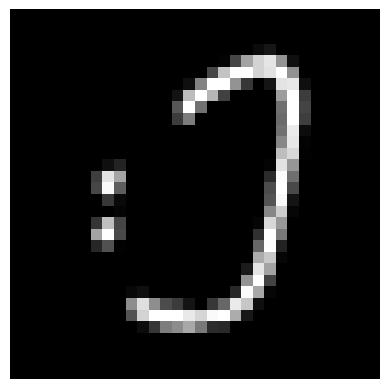

True Label: 3, Predicted Label: 4


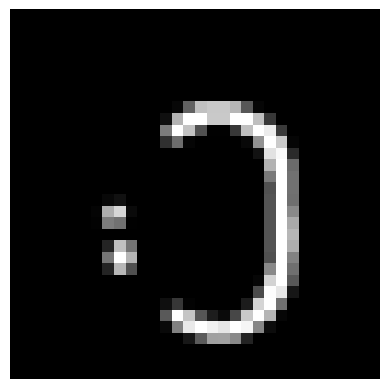

True Label: 3, Predicted Label: 3


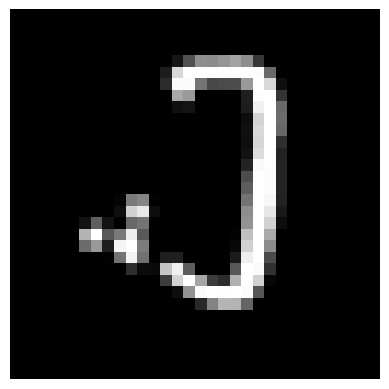

True Label: 4, Predicted Label: 22


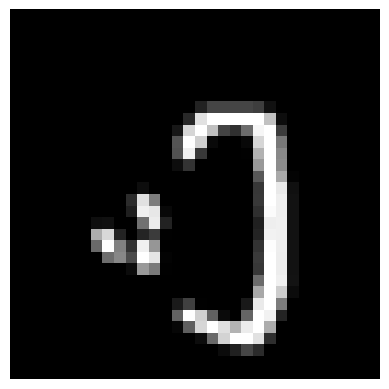

True Label: 4, Predicted Label: 4


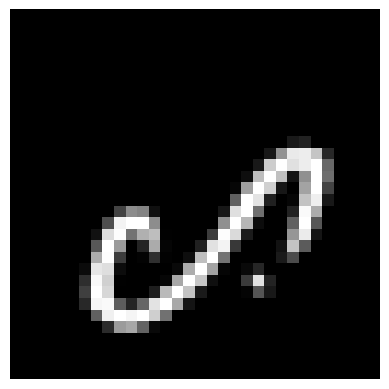

True Label: 5, Predicted Label: 7


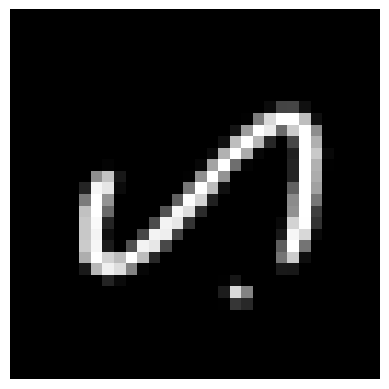

True Label: 5, Predicted Label: 6


In [31]:
predictions = model.predict(Testing_Data)
for i in range(10):  # Display predictions for the first 10 images
    Display(Testing_Data.iloc[i].values)
    print(f'True Label: {Testing_Data_Labels_Series.iloc[i]}, Predicted Label: {predictions[i]}')

In [32]:
best_model_index = np.argmax(models_accuracy)
best_model_name = models_name[best_model_index]
best_model_accuracy = models_accuracy[best_model_index]

print(f'Best Model: {best_model_name}')
print(f'Best Accuracy: {best_model_accuracy * 100:.2f}%')

Best Model: nueral_neatwork_1
Best Accuracy: 79.95%
